---   

<h1 align="center">Spam Detection using Naïve Bayes' Classifier</h1>

---
<h3><div align="right">Ehtisham Sadiq</div></h3>    

<img align="center" width="900"  src="images/spam-classifier.png"  > 

# Learning agenda of this notebook

- Overview of Text Classification
- From Bayes' Theorem to Naïve Bayes' Classifier
    - Marginal Probability
    - Independent Events and Joint Probability
    - Dependent Events and Conditional Probability
    - From Conditional Probability to Bayes’ Theorem
    - Naïve Bayes' Classifier

- Data Acquisition for Spam Filtering
- Exploratory Data Analysis
- Text Pre-Processing
- Text Vectorization using Bag of Words (BoW)
- Model Building (Feed Training Data to Machine Learning Model)
- Evaluate Metrics for Classification Machine Learning Model
- Creating a PipeLine for Predicting New Incoming Messages

# Download/Install Required Libraries

In [1]:
import sys
!{sys.executable} -m pip install -q --upgrade pip
!{sys.executable} -m pip install -q numpy pandas sklearn
!{sys.executable} -m pip install -q nltk spacy gensim wordcloud textblob contractions clean-text unidecode

In [ ]:
from platform import python_version
print(python_version())

# 1. <span style='background :lightgreen' > Overview of Text Classification</span>

<img align="center" width="300"  src="images/text-classification1.png"  > 

<img align="center" width="800"  src="images/text-classification.png"  > 


# 2. <span style='background :lightgreen' > From Bayes' Theorem to Naïve Bayes' Classifier </span>


<img align="right" width="450" height="150"  src="images/prob1.png" >

## a. What is Marginal Probability?
- Probability theory is a branch of mathematics concerned with the analysis of random phenomena, and defines the `likelihood of occurrence of an event`. 
- Probability can be defined as the ratio of the number of favorable outcomes to the total number of outcomes of an event.

$$ P(\text{event}) = \frac{\text{Number of favourable outcomes}}{\text{Total outcomes in }\Omega} $$

- **Marginal probability** is the probability of an event irrespective of all other events.
- The value of the probability of an event to happen can lie between 0 and 1 because the favorable number of outcomes can never cross the total number of outcomes. 
- When the probability of something approaches 1, then it means it is very likely, and when the probability of something approaches 0, then it means that it is very unlikely.
- To understand Probability, we normally start to predict the outcomes for the `tossing of coins`, `rolling of dice`, or `drawing a card from a pack of playing cards`. Later we apply the same concepts in the domains of Artificial Intelligence and Machine Learning.

<img align="center" width="400" height="200"  src="images/prob.gif"  > 

- **Example:**
If we're only flipping the coin once, then there are only two possible outcomes in the sample space $\Omega$: it will either be H or T (using set notation, we could write this as $\Omega$ = {H, T}).
Therefore: $$ P(H) = \frac{1}{2} = 0.5 $$
Equally: $$ P(T) = \frac{1}{2} = 0.5 $$

- **Example:** Consider drawing a single card from a standard deck of 52 playing cards. In this case, the number of possible outcomes in the sample space $\Omega$ is 52. 
There is only one `ace of spades` in the deck, so the probability of drawing it is: $$ P(\text{ace of spades}) = \frac{1}{52} \approx 0.019 $$
In contrast there are four `aces`, so the probability of drawing an ace is: $$ P(\text{ace}) = \frac{4}{52} \approx 0.077 $$

- **Similarly:**
$$ P(\text{spade}) = \frac{13}{52} = 0.25 $$
$$ P(\text{card}) = \frac{52}{52} = 1 $$
$$ P(\text{apple}) = \frac{0}{52} = 0 $$

>- `Independent Events:` Two events are said to be independent, if probability of occurring of one event has not impact on probability of occurring of another event.
>- `Dependent Events:` Two events are said to be dependent, if they happen one after another, and the probability of first event has an impact on the probability of the second event.

## b. Independent Events and Joint Probability
<img align="center" width="300"  src="images/joint-prob.png"  > 

- Two events are said to be `independent`, if probability of occurring of one event has no impact on probability of occurring of another event. An example is rolling two dices together.
- In order to compute the probability of two independent events, we use `joint probability`, that is equal to the product of individual probabilities of the two events.

\begin{equation}
P(A \cap B) \hspace{0.2cm} = \hspace{0.5cm} P(A) \times P(B)
\end{equation}

- Suppose we rolled two dices, what is the probability of getting two sixes?

\begin{equation}
P(A \cap B) \hspace{0.2cm} = \hspace{0.2cm} P(A) \times P(B)  \hspace{0.2cm}= \hspace{0.2cm} \frac{1}{6} \times \frac{1}{6}\hspace{0.2cm}= \hspace{0.2cm}0.0277
\end{equation}



- **Examples:**
- Tossing two or more coins: $\hspace{0.2cm}P(A \cap B) \hspace{0.2cm} = \hspace{0.2cm} \frac{1}{2} \times \frac{1}{2}\hspace{0.2cm}= \hspace{0.2cm} \frac{1}{4}$
- Drawing two cards from a pack of playing cards with replacement: $P(A \cap B) \hspace{0.2cm} = \hspace{0.2cm} \frac{1}{52} \times \frac{1}{52}\hspace{0.2cm}= \hspace{0.2cm} \frac{1}{2704}$
- Owning a dog and driving a car
- Winning the lottery and running out of milk
- Taking a cab home and finding your favorite movie on cable


## c. Dependent Events and Conditional Probability

- **Dependent Events:**
    - Two events are dependent if the occurrence of one affects the probability of the other. In other words, knowing that one event has happened changes how likely the second event is.

- **Conditional Probability:**
    - The conditional probability of an event $𝐴$ A given that event $B$ has already occurred is written as $𝑃(𝐴∣𝐵)$. It tells us the probability of $A$ happening under the condition that $B$ is known to have happened.

<img align="center" width="600"  src="images/cond-prob2.png"  > 


-  In case of two independent events A and B, their conditional probaility is: 
$\hspace{0.5cm}P(A \mid B) \hspace{0.2cm}=\hspace{0.2cm} P(A), \hspace{0.5cm} and   \hspace{0.5cm}P(B \mid A) \hspace{0.2cm}=\hspace{0.2cm} P(B)\hspace{0.5cm}$

> **This shows that knowing one event has happened does not change the chance of the other event happening.**

**Example 1:** What is the probability that a card drawn from a deck of playing cards is a Queen, given that it is a card of Spades?
- Event-B: Card is a Spades (Event has already happened)
- Event-A: Card is a Queen 


\begin{equation} P(B) = \frac{13}{52} \end{equation}

\begin{equation} P(A) = \frac{4}{52} \end{equation}

\begin{equation}
    P(A \mid B) = \frac{P(A \cap B)}{P(B)} \hspace{0.5cm} = \frac{P(A) \times P(B)}{P(B)}  \hspace{0.5cm} \frac{\frac{4}{52}*\frac{13}{52}}{\frac{13}{52}}\hspace{0.5cm} = \hspace{0.5cm}\frac{1}{13}
\end{equation}

**Example 2:**
- Consider the following two events:
    - Event-B: Card drawn from a deck of cards is a face card (Event has already happened)
    - Event-A: Without replacement the second card drawn from the same deck of cards is a face card

\begin{equation} P(B) = \frac{12}{52} \end{equation}

\begin{equation} P(A) = \frac{11}{51} \end{equation}


\begin{equation}
    P(A \mid B) = \frac{P(A \cap B)}{P(B)} \hspace{0.5cm} = \frac{P(A) \times P(B)}{P(B)}  \hspace{0.5cm} \frac{\frac{11}{51}*\frac{12}{52}}{\frac{12}{52}}\hspace{0.5cm} \approx \hspace{0.5cm} 0.216
\end{equation}

- **Example 3:** Consider the given table containing data aout 200 male and female birds in the zoo having brown and blue eyes. Suppose a bird is selected at random,

<img align="right" width="400" height="400"  src="images/cond-prob-ex.png"  >

- What is the probaility that the bird is female?
\begin{equation} P(\text{female}) = \frac{110}{200} \end{equation}


- What is the probaility that the bird is male with brown eyes?
\begin{equation}P(\text{male with brown eyes}) \hspace{0.2cm} = \hspace{0.2cm} \frac{70}{200}\hspace{0.2cm}= \hspace{0.2cm} \frac{7}{20} \end{equation}


- What is the probaility that the bird is female given that it has brown eyes?
\begin{equation}P(\text{female} \mid \text{brown}) \hspace{0.2cm} = \hspace{0.2cm} \frac{P(\text{female} \cap \text{brown})}{P(\text{brown})}\hspace{0.2cm} = \hspace{0.2cm} \frac{\frac{100}{200}}{\frac{170}{200}}\hspace{0.2cm}= \hspace{0.2cm} \frac{10}{17} \end{equation}


- What is the probaility that the bird is male given that it has blue eyes?
\begin{equation}P(\text{male} \mid \text{blue}) \hspace{0.2cm} = \hspace{0.2cm} \frac{P(\text{male} \cap \text{blue})}{P(\text{blue})}\hspace{0.2cm} = \hspace{0.2cm} \frac{\frac{20}{200}}{\frac{30}{200}}\hspace{0.2cm}= \hspace{0.2cm} \frac{2}{3} \end{equation}

- What is the probaility that the bird has blue eyes given that it is female?
\begin{equation}P(\text{blue} \mid \text{female}) \hspace{0.2cm} = \hspace{0.2cm} \frac{P(\text{blue} \cap \text{female})}{P(\text{female})}\hspace{0.2cm} = \hspace{0.2cm} \frac{\frac{10}{200}}{\frac{110}{200}}\hspace{0.2cm}= \hspace{0.2cm} \frac{1}{11} \end{equation}


## d. From Conditional Probability to Bayes’ Theorem
- **Bayes' Theorem** (by Thomas Bayes), is a way of calculating a conditional probability without the joint probability.
- To calculate the probability of event A to occur, given that event B has already occurred, we can use the following **Conditional Probability** formula:

\begin{equation}
    P(A \mid B) = \frac{P(A \cap B)}{P(B)} \hspace{0.5cm} ------(i)
\end{equation}

- Similarly, to calculate the probability that event B occurs, given that event A has already occurred, we can use the same formula, only this time changing out the denominator as follows:

\begin{equation}
    P(B \mid A) = \frac{P(B \cap A)}{P(A)} \hspace{0.9cm} OR \hspace{0.9cm}  P(B \mid A) = \frac{P(A \cap B)}{P(A)} \hspace{0.5cm}------(ii)
\end{equation}

- Multiplying both sides of equation $(i)$ by $P(B)$ gives us:

\begin{equation}
    P(A \mid B) * P(B) = P(A \cap B) \hspace{0.5cm} ------(iii)
\end{equation}


- Similarly, multiplying both sides of equation $(ii)$ by $P(A)$ gives us:

\begin{equation}
    P(B \mid A) * P(A) = P(A \cap B) \hspace{0.5cm} ------(iv)
\end{equation}

- Equating equations $(iii)$ and $(iv)$, we get:

\begin{equation}
P(A \mid B) * P(B) \hspace{0.5cm} = \hspace{0.5cm}  P(B \mid A) * P(A)  \hspace{0.5cm}
\end{equation}

<br>

\begin{equation}
    P(A \mid B) \hspace{0.5cm} = \hspace{0.5cm} \frac{P(A) * P(B \mid A)}{P(B)}, \hspace{0.5cm} P(B)\neq 0 \hspace{0.5cm} ------(v)
\end{equation}

- Where:
    >- P(A|B) is `Posterior Probability`: Probability of an event that is calculated after all the information related to the event has been accounted for. (Also known as conditional probability).
        >- P(A) is `Prior Probability`: Probability of an event that is calculated before considering the new information obtained.
    >- P(B|A) is `Liklihood`: Reverse of the posterior probability.
    >- P(B) is also known as normalization constant.

- **Example 1:** What is the probability that a card drawn from a deck of playing cards is a Queen (Q), given that it is a card of Spades (S)?
   
$ \hspace{0.9cm} P(Q) = \frac{4}{52} , \hspace{0.9cm} P(S) = \frac{13}{52}, \hspace{0.9cm} P(S \mid Q) = \frac{1}{4}, \hspace{0.9cm} P(Q \mid S) = \hspace{0.2cm}? $



\begin{equation}
    P(Q \mid S) \hspace{0.5cm} = \hspace{0.5cm} \frac{P(Q) * P(S \mid Q)}{P(S)}\hspace{0.5cm}\frac{\frac{4}{52} * \frac{1}{4}}{\frac{13}{52}}\hspace{0.5cm} = \hspace{0.5cm}\frac{1}{13}
\end{equation}



- **Example 2:** In a school 60% of boys play football (F) and 36% of boys play cricket (C). The percentage of boys who play cricket given that they also play football is 40%. What is the percentage of those who play football given that they also play cricket?

$ \hspace{0.9cm} P(F) = 0.6 , \hspace{0.9cm} P(C) = 0.36 , \hspace{0.9cm} P(C \mid F) = 0.4, \hspace{0.9cm} P(F \mid C) = \hspace{0.2cm}? $

\begin{equation}
    P(F \mid C) \hspace{0.5cm} = \hspace{0.5cm} \frac{P(F) * P(C \mid F)}{P(C)} \hspace{0.5cm}
\end{equation}

\begin{equation}
    P(F \mid C) \hspace{0.5cm} = \hspace{0.5cm} \frac{0.4 * 0.6}{0.36} \hspace{0.5cm}= \hspace{0.5cm} \frac{4}{6} 
\end{equation}


- **Example 3:** In College of Arts and Design, 40% of girst like music (M), and 24% of girls like dance (D). The percentage of girls who like dance given that they also like music is 30%. What is the probability of girls who like music given they also like dance?

$ \hspace{0.9cm} P(M) = 0.4 , \hspace{0.9cm} P(D) = 0.24 , \hspace{0.9cm} P(D \mid M) = 0.3, \hspace{0.9cm} P(M \mid D) = \hspace{0.2cm}? $

\begin{equation}
    P(M \mid D) \hspace{0.5cm} = \hspace{0.5cm} \frac{P(M) * P(D \mid M)}{P(D)} \hspace{0.5cm}
\end{equation}

\begin{equation}
    P(M \mid D) \hspace{0.5cm} = \hspace{0.5cm} \frac{0.3 * 0.4}{0.24} \hspace{0.5cm}= \hspace{0.5cm} \frac{1}{2} 
\end{equation}


## e. Naïve Bayes' Classifier
- The Naïve Bayes' (NB) is a probabilistic machine learning algorithm that use Bayes’ Theorem for supervised machine learning classification. This algorithm makes an assumption that all the input features are `independent` to eachother and make `equal` contribution to the output label.
<br>
<img align="right" width="300" height="200"  src="images/nb-classifier-types.jpg"  > 

- There are three types of Naïve Bayes model under the scikit-learn library:
    - **Bernoulli Naïve Bayes' (`BernoulliNB`):** It is used when all the input features are binary such that they take only two values. Means 0s can represent “word does not occur in the document” and 1s as "word occurs in the document"
    - **Multinomial Naïve Bayes' (`MultinomialNB`):** It is used when all the input features are discrete having integer values. For example, frequency of occurrences of a term/word in a document.The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). However, in practice, fractional counts such as tf-idf may also work.
    - **Gaussian Naïve Bayes' (`GaussianNB`):** It is used when the input features are continuous values (age, distance, inflation etc), whose probabilities can be modeled using a Gaussian/Normal distribution. 
 
- The output labels can be:
    - **Binary:** Assign observation to one of two groups(yes/no, sick/healthy, long/short, true/false) Example is distinguishing spam and ham emails
    - **Multinomial:** Assign observation to one of N groups (happy, sad, anger, joy, surprise, fear) Example is sentiment analysis of a tweet text to e happy, sad, angery, joyful, surprise, fear, .... Another example can be given an image and you classify it as an apple, banana, orange, mango,....
    - **Ordinal:** Assign observation to one of N ordered groups (baby, child, teen, adult, elder, old) Example is given a text and you want to know if it is written by a baby, child, teen, adult, elder, old,...
    - **Multiclass:** Assign observation to K of N groups. Assigning more than one label to an observation e.g.,  (happy, baby), (sad, child), (angry, adult)


<img align="right" width="400" height="400"  src="images/nb-ex1.png"  >

### (i) Example 1:

- **Example (One input Feature and one output label):** Based on the data in this table. Determine given a new fruit of green color, what type of fruit it is?
<br><br><br><br>
- Probability of the fruit being `orange` given that its color is green:
\begin{equation}
    P(y=orange \mid X=green) \hspace{0.5cm} = \hspace{0.5cm} \frac{P(y=orange) * P(X=green \mid y=orange)}{P(X=green)} \hspace{0.5cm}
\end{equation}

\begin{equation}
    P(y=orange \mid X=green) \hspace{0.5cm} = \hspace{0.5cm} \frac{\frac{46}{100} * \frac{6}{46}}{\frac{26}{100}} \hspace{0.5cm}= \hspace{0.5cm} \frac{6}{26} 
\end{equation}



- Probability of fruit being `apple` given that its color is green:
\begin{equation}
    P(y=apple \mid X=green) \hspace{0.5cm} = \hspace{0.5cm} \frac{P(y=apple) * P(X=green \mid y=apple)}{P(X=green)} \hspace{0.5cm}
\end{equation}

\begin{equation}
    P(y=apple \mid X=green) \hspace{0.5cm} = \hspace{0.5cm} \frac{\frac{54}{100} * \frac{20}{54}}{\frac{26}{100}} \hspace{0.5cm}= \hspace{0.5cm} \frac{20}{26} 
\end{equation}


- **Since  $\hspace{0.3cm}P(y=apple \mid X=green) \hspace{0.1cm} \gt \hspace{0.1cm} P(y=orange \mid X=green),\hspace{0.3cm}$ therefore, we classify the fruit given that its color is green is an apple**

### (ii) Naïve Bayes' Classifier with Multiple Input Features
 
- Consider data set having `n` features represented by $X = x_1, x_2, x_3, ... x_n$ and one output label is y. The full Naïve Bayes' Model can now be written as:

\begin{equation}
    P(y \mid X_i) \hspace{0.5cm} = \hspace{0.5cm} \frac{P(y) * P(X_i \mid y)}{P(X_i)}\hspace{0.5cm}
\end{equation}

\begin{equation}
    P(y \mid x_1,x_2,x_3,...x_n) \hspace{0.5cm} = \hspace{0.5cm} \frac{P(y) * P(x_1 \mid y) * P(x_2 \mid y) * P(x_3 \mid y) ... * P(x_n \mid y)}{P(x_1)*P(x_2)*P(x_3) ... *P(x_n)}
\end{equation}


- For all entries in the dataset, the denominator does not change, it remains static. Therefore, the denominator can be removed and proportionality can be injected.
\begin{equation}
   P(y \mid x_1,x_2,x_3,...x_n)  \hspace{0.5cm} \propto \hspace{0.5cm} P(y) * P(x_1 \mid y) * P(x_2 \mid y) * P(x_3 \mid y) ... * P(x_n \mid y)
\end{equation}


\begin{equation}
   P(y \mid x_1,x_2,x_3,...x_n)  \hspace{0.5cm} \propto \hspace{0.5cm} P(y) * \prod_{i = 1}^{n} P(x_i \mid y)
\end{equation}


- In our case, the output variable (y) has only two outcomes (positive or negative). So we will compute the probability of all these features being positive as well as the probability of all these features being negative. Whatever, probability is larger is our output label.

\begin{equation}
    P(y \mid x_1,x_2,x_3,...x_n)  \hspace{0.5cm} \propto \hspace{0.5cm} argmax_y P(y) * \prod_{i = 1}^{n} P(x_i \mid y)
\end{equation}

<img align="right" width="400"  src="images/nbdata.png"  > 

### (iii) Example 2:
- Let the vector $X_i$ represents the input features:
    - $X_1$ = Outlook
    - $X_2$ = Temperature
    - $X_3$ = Humidity

- And label y represent the ouput
- Writing the numerator of Naive Bayes' classifier as a series of products of conditional probabilities:


\begin{equation}
    P(y \mid x_1,x_2,x_3)  \hspace{0.5cm} = \hspace{0.5cm} argmax_y P(y) * \prod_{i = 1}^{3} P(x_i \mid y)\hspace{2cm}
\end{equation}

\begin{equation}
   P(y \mid x_1,x_2,x_3)  \hspace{0.5cm} = \hspace{0.5cm} P(y) * P(x_1 \mid y) * P(x_2 \mid y) * P(x_3 \mid y))
\end{equation}
<br><br><br>
**Prediction:** `Let us assume that on a particular day the outlook is coludy, temperature is cool and humidity is normal. Predict if it will rain on that day?`


<img align="right" width="300"  src="images/freq-tables.png"  > 

<br><br><br>
$P(y=yes \mid x_1=cloudy,x_2=cool,x_3=normal) \hspace{0.5cm}$
<br><br>

\begin{equation}
\hspace{1cm}=\hspace{0.5cm}P(y=yes)*P(x_1=cloudy|y=yes)*P(x_2=cool|y=yes)*P(x_3=normal|y=yes)
\end{equation}<br>

\begin{equation}
\hspace{1cm}=\hspace{0.5cm}\frac{6}{15}*\frac{5}{6}*\frac{4}{6}*\frac{2}{6}\hspace{0.5cm}=\hspace{0.5cm}\frac{240}{3240}\hspace{0.5cm}=\hspace{0.5cm}0.07407\hspace{7.2cm}
\end{equation}


<br><br>

$P(y=no \mid x_1=cloudy,x_2=cool,x_3=normal) \hspace{0.5cm}$
<br><br>

\begin{equation}
\hspace{1cm}=\hspace{0.5cm}P(y=no)*P(x_1=cloudy|y=no)*P(x_2=cool|y=no)*P(x_3=normal|y=no)
\end{equation}<br>

\begin{equation}
=\hspace{0.5cm}\frac{9}{15}*\frac{3}{9}*\frac{2}{9}*\frac{2}{9}\hspace{0.5cm}=\hspace{0.5cm}\frac{108}{10935}\hspace{0.5cm}=\hspace{0.5cm}0.00988\hspace{5.2cm}
\end{equation}

<br><br><br>
- **Since the probability for $y=yes$ is more therefore we predict that it will rain**


### (iv) Example 3:
- **Given a Labeled Toy Data Set, Calculate Prior probability of output label (positive and negative):**

<img align="center" width="500"  src="images/nb-nlp.png"  > 


- **Calculate the Word Count, Conditional Probabilities and perform Laplace Smoothing:**

<img align="center" width="800"  src="images/nb-nlp3.png"  > 

<h3 align="center"><div class="alert alert-success" style="margin: 20px">I am playing cricket and happy.</h3>
    
\begin{equation}
    P(y \mid x_1,x_2,x_3,...x_n)  \hspace{0.5cm} = \hspace{0.5cm} argmax_y P(y) * \prod_{i = 1}^{n} P(x_i \mid y)\hspace{2cm}
\end{equation}

<br><br>

$P(y=+ \mid x_1=I,x_2=am,x_3=playing, x_4=cricket, x_5=happy) \hspace{0.5cm}$
<br><br>

\begin{equation}
= P(+) * P(I|+) * P(am|+) * P(playing|+) * P(cricket|+) * P(happy|+)
\end{equation}<br>

\begin{equation}
\hspace{4.8cm}=\hspace{0.5cm}0.5*0.19*0.19*0.10*0.10*0.14\hspace{0.5cm}=\hspace{0.5cm}0.00002527\hspace{7.2cm}
\end{equation}

    
<br><br>

$P(y=- \mid x_1=I,x_2=am,x_3=playing, x_4=cricket, x_5=happy) \hspace{0.5cm}$
<br><br>

\begin{equation}
= P(-) * P(I|-) * P(am|-) * P(playing|-) * P(cricket|-) * P(happy|-)
\end{equation}<br>

\begin{equation}
\hspace{4.8cm}=\hspace{0.5cm}0.5*0.19*0.19*0.10*0.10*0.10\hspace{0.5cm}=\hspace{0.5cm}0.00001805\hspace{7.2cm}
\end{equation}

<br><br><br>
- **Since the probability for $y=+$ is more therefore we classify that the given document belong to Positive class**

<h3 align="center"><div class="alert alert-success" style="margin: 20px">I am playing cricket and not sad.</h3>
 

# 3. <span style='background :lightgreen' > Data Acquisition for Spam Filtering </span>

## a. Download Dataset
- SMS Spam Collection Dataset available at UCI repository: [https://archive-beta.ics.uci.edu/ml/datasets/sms+spam+collection](https://archive.ics.uci.edu/dataset/228/sms+spam+collection)
- The dataset contains text of 5572 SMS message, labeled as ham or spam

In [106]:
!cat datasets/SMSSpamCollection

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
ham	Ok lar... Joking wif u oni...
spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
ham	U dun say so early hor... U c already then say...
ham	Nah I don't think he goes to usf, he lives around here though
spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
ham	Even my brother is not like to speak with me. They treat me like aids patent.
ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
spam	H

## b. Load Downloaded Dataset (`smsspamcollection`) in Pandas DataFrame

In [107]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import wordcloud

In [ ]:
!ls datasets/

In [108]:
import pandas as pd
df = pd.read_csv('datasets/SMSSpamCollection', sep='\t', names=['label','text'], header=None)
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [109]:
print(df.label[2])
print(df.text[2])

spam
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [110]:
print(df.label[20])
print(df.text[20])

ham
Is that seriously how you spell his name?


## c. Add Features

### (i) Length of Characters in Message

In [111]:
# Add a new feature containing length of characters in text messages
df['length'] = df['text'].apply(len)
df

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


### (ii) Count of Punctuations in Message

In [112]:
import string
def count_punc(mystr):
    return len([c for c in mystr if c in string.punctuation])

df['punc'] = df['text'].apply(lambda x: count_punc(x))
df

,label,text,length,punc
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [113]:
# this will return all the punctuation marks
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## d. Save the updated Dataframe in a New CSV File

In [114]:
# save the resulting datafrrame to a new csv file
df.to_csv('datasets/sms1.csv', index=False)

# 4. <span style='background :lightgreen' > Exploratory Data Analysis </span>

## a. Load Updated Dataset (`sms1.csv`) in Pandas DataFrame

In [115]:
df = pd.read_csv('datasets/sms1.csv')
df

,label,text,length,punc
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


## b. Locate and Handle NULL Values (if any)

In [116]:
df.shape

(5572, 4)

In [117]:
df.label.isna().sum()

0

In [118]:
df.text.isna().sum()

0

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
 2   length  5572 non-null   int64 
 3   punc    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


>- We can use `df.dropna(axis=0, how='any', inplace=True)` method to drop the rows having NA in any of the column
>- We can use `df.fillna(value, method, inplace=True)` method, where `value` or `method` argument specify the new value or the method to use to replace the missing values (`ffill(), bfill()`)

## c. Visualize the Count of Two Target Classes (HAM and SPAM)

In [120]:
# Let's see how many ham and spam samples we have in our dataframe
df.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [121]:
# Normalized value counts
df.label.value_counts(normalize=True)

label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

>- The dataset contains 4825 ham and 747 spam messages.
>- Seeing the count of positive and negative messages, it appears that the dataset is not very much balanced.

<Figure size 1200x1200 with 0 Axes>

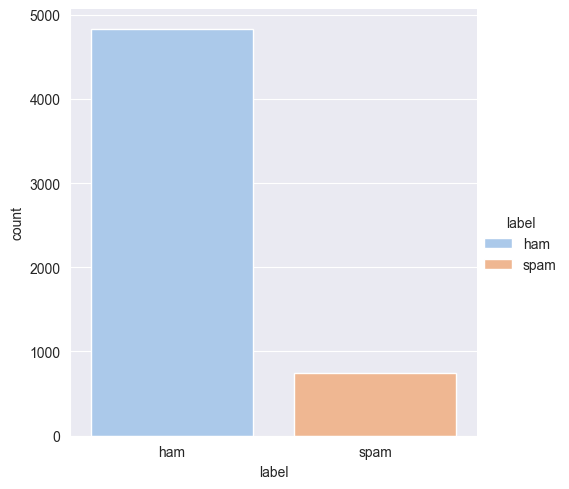

In [122]:
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(12,12))
sns.catplot(x ='label',kind='count',hue='label', data = df, palette='pastel', legend=True);
plt.show();

## d. Visualize Length of Text in HAM and SPAM Messages

In [123]:
#Create a dataframe containing only ham messages
df_ham  = df[df['label'] == 'ham'].copy()
#Create a dataframe containing only spam messages
df_spam = df[df['label'] == 'spam'].copy()

In [124]:
df_ham

,label,text,length,punc
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2
...,...,...,...,...
5565,ham,Huh y lei...,12,3
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [125]:
df_spam

,label,text,length,punc
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8
...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


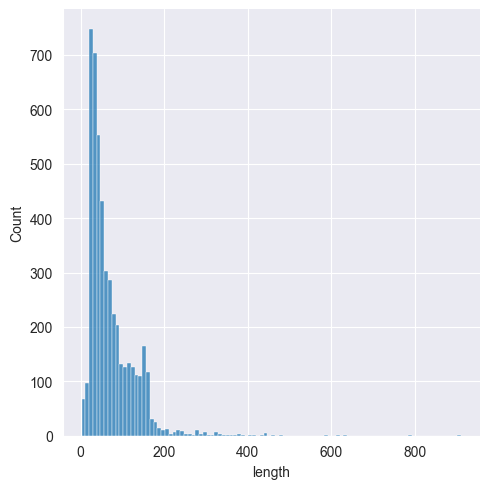

In [126]:
# Histogram of length of text in ham messages
sns.displot(x= 'length', data=df_ham, kind='hist', bins=100);

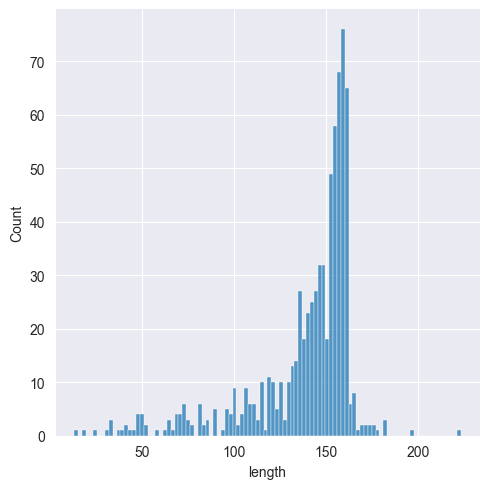

In [127]:
# Histogram of length of text in spam messages
sns.displot(x= 'length', data=df_spam, kind='hist', bins=100);

>- Looks like spam messages are generally longer than ham messages.
>- Bulk of ham has length below 100, for spam it is above 100.
>- Can this feature be used for classification?

## e. Visualize Punctuation Count in HAM and SPAM Messages

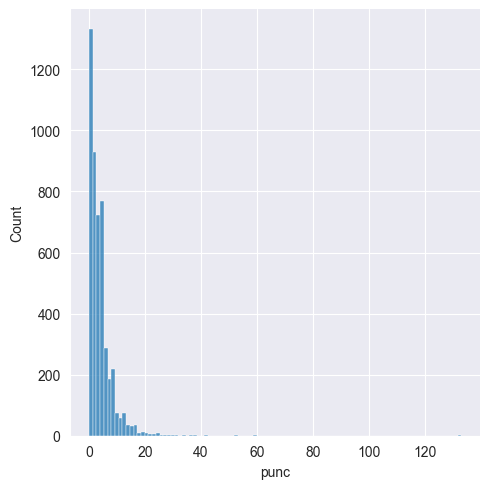

In [128]:
# Histogram of punctuation count of ham messages
sns.displot(x= 'punc', data=df_ham, kind='hist', bins=100);

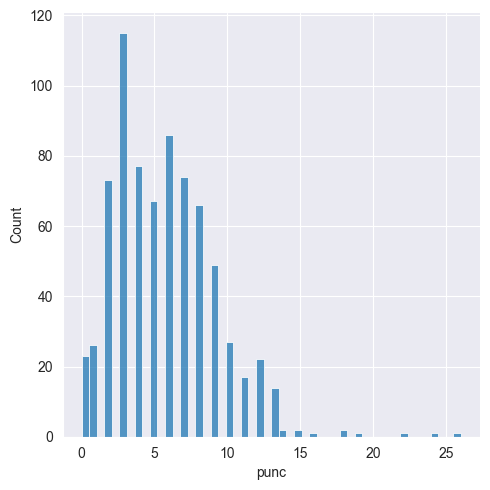

In [129]:
# Histogram of punctuation count of spam messages
sns.displot(x= 'punc', data=df_spam, kind='hist', bins=50);

>- Looks like spam messages have far less number of punctuations
>- Can this feature be used for classification?

## f. Word Cloud of HAM vs SPAM
- Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

In [130]:
import wordcloud
from matplotlib import pyplot as plt

def show_wordcloud(data_spam_or_ham, title):
    text = ' '.join(data_spam_or_ham['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

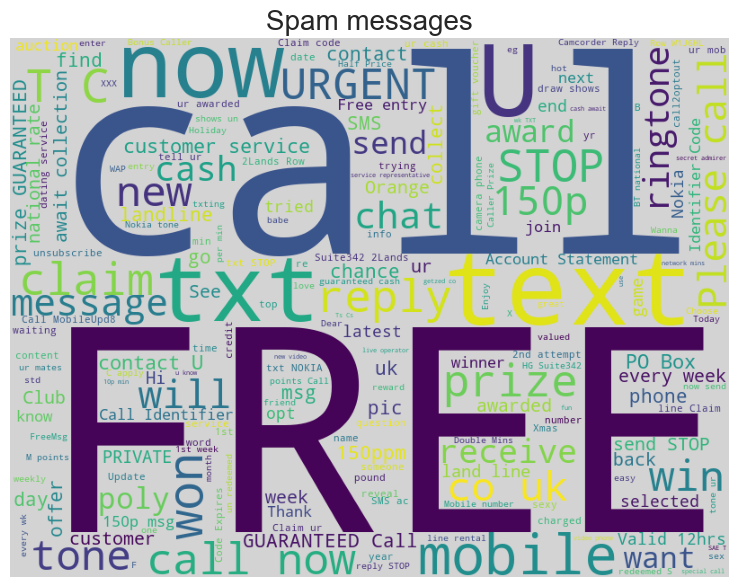

In [131]:
show_wordcloud(df_spam, "Spam messages")

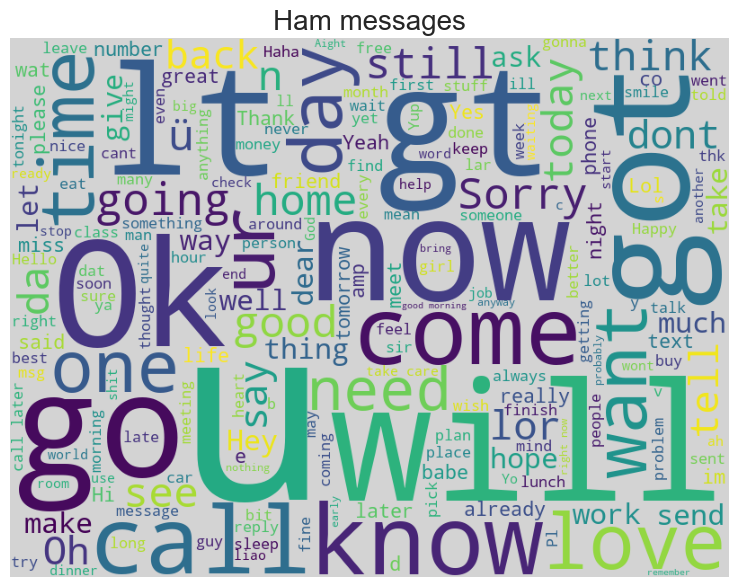

In [132]:
show_wordcloud(df_ham, "Ham messages")

# 5. <span style='background :lightgreen' > Text Pre-Processing </span>
<img align="center" width="600"  src="images/preprocessing.png"  > 

## a. Load Updated Dataset (`sms1.csv`) in Pandas DataFrame

In [133]:
import pandas as pd
df = pd.read_csv("datasets/sms1.csv")
df.head()

,label,text,length,punc
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [134]:
df.shape

(5572, 4)

## b. Basic Preprocessing, tokenization, stopword removal and stemming

In [135]:
import re
import string
import contractions
from cleantext import clean
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
wn = WordNetLemmatizer()

def text_preprocessing(mystr):
    mystr = mystr.lower()                                               # case folding
    mystr = re.sub('\w*\d\w*', '', mystr)                               # remove digits
    mystr = re.sub('\n', ' ', mystr)                                    # replace new line characters with space
    mystr = re.sub('[‘’“”…]', '', mystr)                                # removing double quotes and single quotes
    mystr = re.sub('<.*?>', '', mystr)                                  # removing html tags 
    mystr = re.sub(r'\[.*?\]', '', mystr)                               # remove text in square brackets
    mystr = re.sub('https?://\S+|www.\.\S+', '', mystr)                 # removing URLs
    mystr = re.sub('\n', ' ', mystr)                                    # replace new line characters with space
    mystr = clean(mystr, no_emoji=True)                                 # remove emojis
    mystr = ''.join([c for c in mystr if c not in string.punctuation])  # remove punctuations
    mystr = ' '.join([contractions.fix(word) for word in mystr.split()])# expand contractions
    
    tokens = word_tokenize(mystr)                                       # tokenize the string
    mystr = ''.join([c for c in mystr if c not in string.punctuation])  # remove punctuations
    tokens = [token for token in tokens if token not in stop_words]     # remove stopwords
#   tokens = [ps.stem(token) for token in tokens]                       # stemming
    tokens = [wn.lemmatize(token) for token in tokens]                   # lemmatization
    new_str = ' '.join(tokens)
    return new_str

In [137]:
df.text[3]

'U dun say so early hor... U c already then say...'

In [136]:
text_preprocessing(df.text[3])

'dun say early hor c already say'

In [138]:
df['processed_text'] = df['text'].apply(lambda x: text_preprocessing(x))
df.head()

,label,text,length,punc,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,9,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,6,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,free entry wkly comp win fa cup final tkts may...
3,ham,U dun say so early hor... U c already then say...,49,6,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,nah think go usf life around though


## c. Verification of Text Preprocessing

In [139]:
df['text'][20]

'Is that seriously how you spell his name?'

In [140]:
print(df['processed_text'][20])

seriously spell name


In [141]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [142]:
print(df['processed_text'][10])

going home soon want talk stuff anymore tonight k cried enough today


# 6. <span style='background :lightgreen' > Text Vectorization using Bag of Words (BoW)</span>
- Frequency or statistical based approaches
    - Label Encoding
    - One-Hot encoding
    - Bag of words
    - Bag of n-grams
    - TF-IDF
- Prediction based approaches (Embeddings)
    - Word2Vec — From Google
    - Fast text — From Facebook

## a. Recap of BoW:
- Bag of Words (BoW) is the most basic strategy for converting a text document into numbers, which specifies the presence/count of a word/n-grams in a vocabulary

**Option 1:**

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer() 
bow = cv.fit_transform(df['processed_text'])  # generates vocabulary dictionary and returns a DTM

**Option 2:**

In [143]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(preprocessor=text_preprocessing) 
bow = cv.fit_transform(df['text'])  # generates vocabulary dictionary and returns a DTM

In [144]:
print(len(cv.vocabulary_))

7588


In [145]:
print(cv.get_feature_names_out())

['aa' 'aah' 'aaniye' ... 'zoom' 'zouk' 'zyada']


In [146]:
bow.shape

(5572, 7588)

In [147]:
bow

<5572x7588 sparse matrix of type '<class 'numpy.int64'>'
	with 42324 stored elements in Compressed Sparse Row format>

>- The DTM contains 5572 rows as there are 5572 messages/sms
>- The DTM contains 7605 columns as there are 7605 unique words in the vocabulary of messages

In [148]:
# Since bow is a sparse matrix, so to change it to a dense matrix or array we can use the numpy toarray() method
#bow.toarray()
bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

## b. Understand the sparsity of the resulting Document-Term-Matrix

In [149]:
# Total count of cells are:
total_cells = bow.shape[0] * bow.shape[1]
total_cells

42280336

In [150]:
# Total count of non-zero cells are:
nonzero_cells = bow.nnz
nonzero_cells

42324

In [151]:
# Percentage of non-zero values in the document term matrix are:
percentage = (nonzero_cells/total_cells)*100
percentage

0.10010327259461704

>- The DTM contains over `42 Million` cells, out of which just `42 K` contains non-zero values. 
>- So 99.9% cells contains a zero value.
>- In order to save memory space and speed up algebraic operations, we use sparse representation of matrix.

## c. Let us check out and understand BoW vector representation of  a specific sms message

In [152]:
print(df.text[9])
print("\n",df['processed_text'][9])
print("\n",df['label'][9])

Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030

 mobile month r entitled update latest colour mobile camera free call mobile update co free

 spam


In [153]:
bow[9]

<1x7588 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [154]:
bow[9].nnz

10

In [155]:
print(bow[9])

  (0, 2390)	2
  (0, 912)	1
  (0, 4109)	3
  (0, 4140)	1
  (0, 2003)	1
  (0, 6940)	2
  (0, 3577)	1
  (0, 1226)	1
  (0, 933)	1
  (0, 1194)	1


## d. View the Document-Term-Matrix in a Pandas Dataframe
- You may opt not to save it on disk, rather the sparse matrix representation that is already there in the bow variable to proceed further

In [156]:
import pandas as pd
dtm = pd.DataFrame(data=bow.todense())
dtm

,0,1,2,3,4,5,6,7,8,9,...,7578,7579,7580,7581,7582,7583,7584,7585,7586,7587
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 7. <span style='background :lightgreen' > Model Building (Feed Training Data to Machine Learning Model) </span>

## a. Choose Machine Learning Model
We can use any of the following machine learning models for classification problems:
- `Naive Bayes`
- `Logistic Regression`
- `Support Vector Machine`
- `K-Nearest Neighbours`
- `Decision Tree Classifier`
- `Random Forest Classifier`
- `XGBoost Classifier` 
- `AdaBoost Classifier`  

### Naive Bayes Classifier
- The Naïve Bayes' (NB) is a probabilistic machine learning algorithm that use Bayes’ Theorem for supervised machine learning classification. This algorithm makes an assumption that all the input features are `independent` to eachother and make `equal` contribution to the output label.
<br>
<img align="right" width="300" height="200"  src="images/nb-classifier-types.jpg"  > 

- There are three types of Naïve Bayes model under the scikit-learn library:
    - **Bernoulli Naïve Bayes' (`BernoulliNB`):** It is used when all the input features are binary such that they take only two values. Means 0s can represent “word does not occur in the document” and 1s as "word occurs in the document"
    - **Multinomial Naïve Bayes' (`MultinomialNB`):** It is used when all the input features are discrete having integer values. For example, frequency of occurrences of a term/word in a document.The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). However, in practice, fractional counts such as tf-idf may also work.
    - **Gaussian Naïve Bayes' (`GaussianNB`):** It is used when the input features are continuous values (age, distance, inflation etc), whose probabilities can be modeled using a Gaussian/Normal distribution. 

>-  Scikit-Learn is an extension of SciPy
>- Its primary contribution is an “API for machine learning” that exposes the implementations of a wide array of model families into a single, user-friendly interface. 
>- So we can use Scikit-Learn to simultaneously train a staggering variety of models, evaluate and compare them, and then utilize the fitted model to make predictions on new data. 
>- Since Scikit-Learn provides a standardized API, this can be done with little effort and models can be prototyped and evaluated by simply swapping out a few lines of code.

## b. Split Data for Training and Testing
<img align="center" width="500"  src="images/img1.jpeg"  > 

#### (i) Input Features `X` and Output Label Classes `y`

In [157]:
X = bow
X

<5572x7588 sparse matrix of type '<class 'numpy.int64'>'
	with 42324 stored elements in Compressed Sparse Row format>

In [158]:
# Since our output label can belong to two classes ham or spam so we need to vectorize that column to zero and ones
# This can be done using one-hot encoding
y = df['label']
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

#### (ii) Split Data for Training and Testing
<img align="left" width="400"  src="images/train_test_split.png"  > 

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5, shuffle=True)

> The number of outputs will be equal to 2 times the number of inputs. So if you only provide an `X` input to the function, there will be two outputs (`X_train` and `X_test`). If you provide an `X` and `y` input to the function, there will be four outputs (`X_train`, `X_test`, `y_train`, and `y_test`)

In [160]:
print('Size of Training Input Data:', X_train.shape)
print('Size of Training Labels:', y_train.shape)
print('\nSize of Testing Input Data: ', X_test.shape)
print('Size of Testing Labels: ', y_test.shape)

Size of Training Input Data: (3900, 7588)
Size of Training Labels: (3900,)

Size of Testing Input Data:  (1672, 7588)
Size of Testing Labels:  (1672,)


## c. Fit NBC Model on the Training Data

In [161]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

> Hyperparameters are like knobs on an oven you can tune to cook your favourite dish. Check them out using `model.get_params()` method:
>- `alpha`: float, default=1.0 Additive (Laplace/Lidstone) smoothing parameter(0 for no smoothing).
>- `class_prior`: array-like of shape (n_classes,), default=None Prior probabilities of the classes. If specified the priors are not adjusted according to the data.
>- `fit_prior`: bool, default=True. Whether to learn class prior probabilities or not. If false, a uniform prior will be used.

In [162]:
model.fit(X_train, y_train)

MultinomialNB()

> A machine learning model training actually creates a mathematical representation of the relationship between the input features and the target label.

# 8. <span style='background :lightgreen' > Evaluate Metrics for Classification Machine Learning Model </span>

## a. Confusion Matrix

In [163]:
predictions = model.predict(X_test)
predictions

array(['spam', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [164]:
y_test

2095    spam
5343     ham
564     spam
3849     ham
3317     ham
        ... 
4569     ham
3714     ham
1885     ham
5313     ham
1922     ham
Name: label, Length: 1672, dtype: object

In [165]:
print("y_test.shape: ", y_test.shape)
print("prediction.shape: ", predictions.shape)

y_test.shape:  (1672,)
prediction.shape:  (1672,)


In [166]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[1410,   39],
       [  13,  210]])

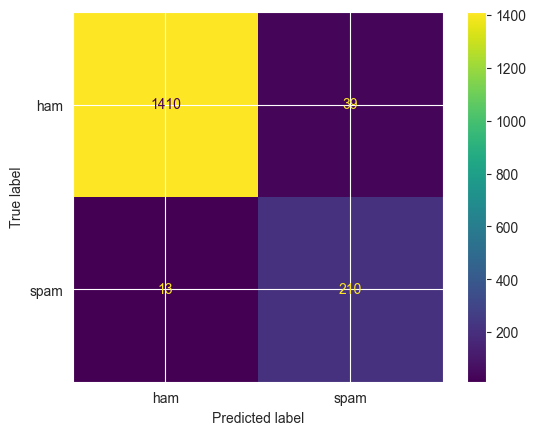

In [167]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot();

In [ ]:
# from sklearn.metrics import ConfusionMatrixDisplay
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
# disp.plot();

fig, ax = plt.subplots(figsize=(8,8))
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
ax.tick_params()
disp.plot(ax=ax);

# <h3 align="center"><div class="alert alert-success" style="margin: 10px">The Confusion Matrix is not confusing for humans</h3>

<img align="center" width="600"  src="images/cm-sms1.png"  > 


- **True Positives (TP): 1410**
    - Actual ham emails are correctly classified as ham.

- **False Negatives (FN): 39**
    - Actual ham emails are incorrectly classified as spam (missed ham).

- **False Positives (FP): 13**
    - Actual spam emails are incorrectly classified as ham (spam mistaken for ham).

- **True Negatives (TN): 210**
    - Actual spam emails are correctly classified as spam.

## b. Accuracy
<img align="right" width="400"  src="images/cm-sms1.png"  > 

- Accuracy actually answers the question: **How often is the model correct?**

\begin{equation}
Accuracy \hspace{0.5cm} = \hspace{0.5cm} \frac{\text{Count of correct answers of Classifier}}{\text{Count  of all Qs asked from Classifier}}\hspace{2cm}
\end{equation}

\begin{equation}
Accuracy \hspace{0.5cm} = \hspace{0.5cm} \frac{TP + TN}{TP + TN + FP + FN}\hspace{5cm}
\end{equation}

\begin{equation}
Accuracy \hspace{0.5cm} = \hspace{0.5cm} \frac{1410 + 210}{1410 + 210 + 13 + 39}\hspace{0.5cm} = \hspace{0.5cm} \frac{1620}{1672}\hspace{0.5cm} = \hspace{0.5cm} 0.9688
\end{equation}

- So accuracy is an evaluation metric used for classification algorithms that tells us what fraction of time the classifier was correct in classification.

In [168]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))
print(accuracy_score(y_test, predictions, normalize=False))

0.9688995215311005
1620.0


<img align="right" width="350"  src="images/accuracy-paradox2.png"  > 

## c. The Accuracy Paradox
- Accuracy does not prove to be a good evaluation metric in case of imbalance data sets; which are very common in real world scenarios.

\begin{equation}
Accuracy \hspace{0.2cm} = \hspace{0.2cm} \frac{TP + TN}{TP + TN + FP + FN}\hspace{0.2cm} = \hspace{0.2cm} \frac{95 + 0}{95 + 0 + 5 + 0}\hspace{0.2cm} = \hspace{0.2cm} \frac{95}{100}\hspace{0.2cm} = \hspace{0.2cm} 0.95
\end{equation}



- So a classifier that always predicts the majority class, in highly imbalanced dataset, will always have a high accuracy score.
- Therefore, accuracy is not a good evaluation metrics, when the goal is to discover a rare event. For example, out of all the tweets make in Pakistan in last one month, classify tweets that are made about my youtbue channel (LearnwithArif). If a classifier return False to all the tweets, the accuracy of such a classfier will be around 99.9%
- **Conclusion:** We should not rely solely on Accuracy as a metric. This is where Precision, Recall and F1 Score comes in :)

## d. Precision
- Precision actually answers the question: **When prediction is positive, how often it matches with the ground positive?**

<img align="right" width="370"  src="images/cm-precision.png"  > 

\begin{equation}
Precision \hspace{0.1cm} = \hspace{0.1cm} \frac{\text{True Positives}}{\text{Predicted Positives}}\hspace{0.1cm} = \frac{TP}{TP + FP}
\end{equation}
<br><br>
- If we consider `ham` label as positive:
\begin{equation}
Precision \hspace{0.1cm} = \hspace{0.1cm} \frac{1410}{1410 + 13} =  \frac{1410}{1423} = 0.9908
\end{equation}
<br><br>
- If we consider `spam` label as positive:
\begin{equation}
Precision \hspace{0.1cm} = \hspace{0.1cm} = \frac{210}{210 + 39} =  \frac{210}{249} = 0.8433
\end{equation}

In [ ]:
df.label.value_counts()

In [169]:
from sklearn.metrics import precision_score
print(precision_score(y_test, predictions, pos_label='ham'))
print(precision_score(y_test, predictions, pos_label='spam'))


0.9908643710470836
0.8433734939759037


## e. Recall (a.k.a Sensitivity)

- Recall actually answers the question: **When ground reality is a positive, how often it is correct?**

<img align="right" width="370"  src="images/cm-recall.png"  > 

\begin{equation}
Recall \hspace{0.1cm} = \hspace{0.1cm} \frac{\text{True Positives}}{\text{Real Positives}}\hspace{0.1cm} = \frac{TP}{TP + FN}
\end{equation}
<br><br>
- If we consider `ham` label as positive:
\begin{equation}
Recall \hspace{0.1cm} = \hspace{0.1cm} \frac{1410}{1410 + 39} =  \frac{1410}{1449} = 0.9730
\end{equation}
<br><br>
- If we consider `spam` label as positive:
\begin{equation}
Recall \hspace{0.1cm} = \frac{210}{210 + 13} =  \frac{210}{223} = 0.9417
\end{equation}


- If Recall is high, that means the classifier is good in identifying the real patients.

In [170]:
from sklearn.metrics import recall_score
print(recall_score(y_test, predictions, pos_label='ham'))
print(recall_score(y_test, predictions, pos_label='spam'))

0.9730848861283644
0.9417040358744395


## f. Limitation of Precision and Recall

<img align="center" width="900"  src="images/cm-pr-lim.png"  > 

## g. F-1 Score
- Precision and Recall alone do not solve the Accuracy Paradox. So, we combine both these metrics to create a new metric called F1 Score, which is harmonic mean of precision and recall. 
- We use harmonic mean instead of arithmetic mean because harmonic mean punishes extreme values more. OR in simple words, the harmonic means goes to zero if either of the recall or precision ends up being zero

<img align="right" width="400"  src="images/cm-sms1.png"  > 


\begin{equation}
F1 \hspace{0.5cm} = \hspace{0.5cm} \left( \frac{Precision^{-1} + Recall^{-1}}{2}\right)^{-1}\hspace{3cm}
\end{equation}

\begin{equation}
F1 \hspace{0.2cm} = \hspace{0.2cm} \left( \frac{\frac{1}{P} + \frac{1}{R}}{2}\right)^{-1}\hspace{0.2cm} = \hspace{0.2cm} \left( \frac{2} {\frac{1}{P} + \frac{1}{R}}\right)\hspace{0.2cm} = \hspace{0.2cm} \left( \frac{2PR}{P +R}\right)
\end{equation}
<br><br>
- If we consider `ham` label as positive:
\begin{equation}
F1 \hspace{0.5cm} = \hspace{0.5cm} \frac{2*0.99*0.97}{0.99+0.97} \hspace{0.5cm}= \hspace{0.5cm} \frac{1.926}{0.9603} \hspace{0.5cm}=\hspace{0.5cm} 0.98
\end{equation}
<br><br>
- If we consider `spam` label as positive:
\begin{equation}
F1 \hspace{0.5cm} = \hspace{0.5cm} \frac{2*0.84*0.94}{0.84+0.94} \hspace{0.5cm}= \hspace{0.5cm} \frac{1.5792}{1.78} \hspace{0.5cm}=\hspace{0.5cm} 0.89
\end{equation}


- F1 score will be high, if **both** precision and recall are high.
- F1 score will be low, if **any** of precision or recall are low.

- We use harmonic mean instead of arithmetic mean because harmonic mean punishes extreme values more. OR in simple words, the harmonic means goes to zero if either of the recall or precision ends up being zero

In [171]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.99      0.97      0.98      1449
        spam       0.84      0.94      0.89       223

    accuracy                           0.97      1672
   macro avg       0.92      0.96      0.94      1672
weighted avg       0.97      0.97      0.97      1672



> **ROC Curve:**
>- My dear students, other than Accuracy, Precision, Recall and F1 score, there are many more metrics stemming from confusion matrix.
>- The tradeoff between precision and recall can be understood using `Receiver Operator Characteristic (ROC) curve`, which is a plot between the false positive rate (FPR) along x-axis versus the true positive rate (TPR) along y-axis at different probability threshold values between 0.0 and 1.0. The area under the curve represents the goodness of the model. 
>- For details visit: https://en.wikipedia.org/wiki/Confusion_matrix

In [172]:
model

MultinomialNB()

# 9. <span style='background :lightgreen' > Model Deployment</span>
<img align="center" width="800"  src="images/deployment.png"  > 

## a. PipeLine  for the Multinomial Naive Bayes Classifier
<img align="center" width="700"  src="images/nlp-pipeline-obj.png"  > 

In [173]:
# Read the Dataset
import pandas as pd
df = pd.read_csv("datasets/sms1.csv")
df.head()

,label,text,length,punc
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [174]:
X=df['text']

In [175]:
y = df['label']

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [177]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

pipe = Pipeline([ ('bow'  , CountVectorizer(preprocessor=text_preprocessing)),
                  ('model' , MultinomialNB())
                ])
type(pipe)

sklearn.pipeline.Pipeline

In [178]:
pipe.fit(X=X_train, y=y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(preprocessor=<function text_preprocessing at 0x1565b6fc0>)),
                ('model', MultinomialNB())])

In [179]:
new_sms = ["Good Morning Ehtisham, today is bad for me"]
pipe.predict(new_sms)

array(['ham'], dtype='<U4')

In [180]:
new_sms = ["Call me now and get a free mobile"]
pipe.predict(new_sms)

array(['spam'], dtype='<U4')

## **Application development using streamlit**

In [182]:
# Step 1: Save the pipe Object
import joblib

# Save the pipeline object to a file
joblib.dump(pipe, 'spam_classifier_pipeline.pkl')

['spam_classifier_pipeline.pkl']

In [ ]:
# !pip install streamlit

In [ ]:
# Step 2: Create a Streamlit Application

import streamlit as st
import joblib
from preprocessing import text_preprocessing
# Load the saved pipeline
pipe = joblib.load('spam_classifier_pipeline.pkl', mmap_mode=None)

# Streamlit application title
st.title("Spam Detection using Naïve Bayes Classifier")

# User input for SMS
user_input = st.text_area("Enter your message:")

# Button to make prediction
if st.button("Predict"):
    if user_input:
        prediction = pipe.predict([user_input])
        st.write(f"The message is: **{prediction[0]}**")
    else:
        st.write("Please enter a message to classify.")


In [102]:
# !streamlit run app.py

In [104]:
from IPython.core.display import HTML

style = """
    <style>
        body {
            background-color: #f2fff2;
        }
        h1 {
            text-align: center;
            font-weight: bold;
            font-size: 36px;
            color: #4295F4;
            text-decoration: underline;
            padding-top: 15px;
        }
        
        h2 {
            text-align: left;
            font-weight: bold;
            font-size: 30px;
            color: #4A000A;
            text-decoration: underline;
            padding-top: 10px;
        }
        
        h3 {
            text-align: left;
            font-weight: bold;
            font-size: 30px;
            color: #f0081e;
            text-decoration: underline;
            padding-top: 5px;
        }

        
        p {
            text-align: center;
            font-size: 12 px;
            color: #0B9923;
        }
    </style>
"""

html_content = """
<h1>Hello</h1>
<p>Hello World</p>
<h2> Hello</h2>
<h3> World </h3>
"""

HTML(style + html_content)